In [162]:
from dataclasses import dataclass

@dataclass
class Fight:
    R_fighter:str
    B_fighter:str
    R_record:list
    B_record:list
    Rematch:bool
    R_KD:int
    B_KD:int
    R_SIG_STR:list  #need to split
    B_SIG_STR:list  #need to split
    R_TD:list       #need to split
    B_TD:list       #need to split
    R_SUB_ATT:int
    B_SUB_ATT:int
    R_CTRL:int  
    B_CTRL:int  #use this to find total time spent on the ground 
    R_HEAD:list     #need to split
    B_HEAD:list     #need to split
    win_by:str
    last_round:int
    last_round_time:int 
    date:str
    Fight_type:str 
    Winner:str
    excitement:float

In [163]:
#open the database and assign to the class


f = open("Optimized_database.csv", "r")
excel = f.read().split("\n")

header = excel[0]
header = header.split(",")
excel = excel[1:7273]

f.close()

database = []
for datapoint in excel:
    datapoint = datapoint.split(",")

    if datapoint[4] == "True":
        datapoint[4] = True
    else:
        datapoint[4] = False
    
    fight = Fight(datapoint[0], datapoint[1], datapoint[2].split("_"), datapoint[3].split("_"), datapoint[4]
                  , datapoint[5], datapoint[6], datapoint[7].split("_"), datapoint[8].split("_"), 
                  datapoint[9].split(" of "), datapoint[10].split(" of "), 
                  datapoint[11], datapoint[12], datapoint[13], datapoint[14],
                    datapoint[15].split("_"), datapoint[16].split("_"), datapoint[17], 
                    datapoint[18], datapoint[19], datapoint[20], datapoint[21],
                    datapoint[22],0)
    
    #convert the list entries to int
    fight.R_record = [int(x) for x in fight.R_record]
    fight.B_record = [int(x) for x in fight.B_record]
    fight.R_SIG_STR = [int(x) for x in fight.R_SIG_STR]
    fight.B_SIG_STR = [int(x) for x in fight.B_SIG_STR]
    fight.R_TD = [int(x) for x in fight.R_TD]
    fight.B_TD = [int(x) for x in fight.B_TD]
    fight.R_HEAD = [int(x) for x in fight.R_HEAD]
    fight.B_HEAD = [int(x) for x in fight.B_HEAD]
    fight.R_CTRL = int(fight.R_CTRL)
    fight.B_CTRL = int(fight.B_CTRL)
    fight.R_KD = int(fight.R_KD)
    fight.B_KD = int(fight.B_KD)
    fight.R_SUB_ATT = int(fight.R_SUB_ATT)
    fight.B_SUB_ATT = int(fight.B_SUB_ATT)
    fight.last_round = int(fight.last_round)
    fight.last_round_time = int(fight.last_round_time)
    fight.excitement = float(fight.excitement)

    database.append(fight)

print(database[7271])
print("Importing complete...")

Fight(R_fighter='Scott Morris', B_fighter='Sean Daugherty', R_record=[1, 0, 0], B_record=[0, 1, 0], Rematch=False, R_KD=0, B_KD=0, R_SIG_STR=[1, 1], B_SIG_STR=[0, 4], R_TD=[1, 1], B_TD=[0, 0], R_SUB_ATT=1, B_SUB_ATT=0, R_CTRL=0, B_CTRL=0, R_HEAD=[1, 1], B_HEAD=[0, 2], win_by='Submission', last_round=1, last_round_time=20, date='11-Mar-94', Fight_type="Men's Bout", Winner='Scott Morris', excitement=0.0)
Importing complete...


In [164]:
#find number of rematches
rematches = 0
for fight in database:
    if fight.Rematch:
        rematches += 1
print("Number of rematches: ", rematches)

Number of rematches:  179


In [165]:
# import required libraries
from math import e
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 


def generateNormalDistribution():
    # Creating the distribution
    data=[]
    for fight in database:
        #find ratio of sig strikes landed to sig strikes attempted
        if (fight.R_SIG_STR[1] == 0):
            data.append(0)
        else:    
            sig_str_ratio = fight.R_SIG_STR[0]/fight.R_SIG_STR[1]
            data.append(sig_str_ratio)
        
        if (fight.B_SIG_STR[1] == 0):
            data.append(0)
        else:
            sig_str_ratio = fight.B_SIG_STR[0]/fight.B_SIG_STR[1]
            data.append(sig_str_ratio)

    #mean of data
    mu = np.mean(data)
    #standard deviation of data
    sigma = np.std(data)

    return mu, sigma


mu,sigma = generateNormalDistribution()



In [166]:
#measuring excitement functions...

from cmath import sqrt
from numpy import r_


def normalLookup(x, mean = mu, std = sigma):
    p = norm(loc = mu , scale = sigma).cdf(x)
    return p


def excitement(fight):
    k,l,m,n,o,p = 1,2,1,1,1,1 #the scalars
    
    excitement = (k * recordRatio(fight.R_record, fight.B_record) + l * rematch(fight.Rematch) + m * sigStrRatio(fight.R_SIG_STR, fight.B_SIG_STR) + n * timeOnGround(fight.R_CTRL, fight.B_CTRL, fight.last_round, fight.last_round_time) + o* winBy(fight.win_by) + p* fightType(fight.Fight_type))/(k+l+m+n+o+p)

    return excitement


def recordRatio(r_record, b_record):

    #red fighter ratio
    r_wins = r_record[0]
    r_losses = r_record[1]
    r_draws = r_record[2]

    if (r_wins + r_losses + r_draws == 0 or r_wins - (r_losses ** 2) - r_draws < 0):
        red_ratio = 0
    else:   
        red_ratio = (r_wins - (r_losses ** 2) - r_draws)/(r_wins + (r_losses ** 2) + r_draws)
    
    #blue fighter ratio
    b_wins = b_record[0]
    b_losses = b_record[1]
    b_draws = b_record[2]

    if (b_wins + b_losses + b_draws == 0 or b_wins - (b_losses ** 2) - b_draws < 0):
        blue_ratio = 0
    else:
        blue_ratio = (b_wins - (b_losses ** 2) - b_draws)/(b_wins + (b_losses ** 2) + b_draws)

    #total
    total_ratio = (red_ratio + blue_ratio)/2
    return total_ratio

def rematch(rematch):
    if(rematch):
        return 1
    else:
        return 0

def sigStrRatio(r_sig_str, b_sig_str):
    #
    r_sig_landed = r_sig_str[0]
    r_sig_attempted = r_sig_str[1]
    b_sig_landed = b_sig_str[0]
    b_sig_attempted = b_sig_str[1]

    #red part
    if (r_sig_attempted == 0):
        r_ratio = 0
    else:
        r_ratio = r_sig_landed/r_sig_attempted
    r_p = normalLookup(r_ratio)

    red_part = sqrt(r_p * r_ratio)
    
    #blue part
    if (b_sig_attempted == 0):
        b_ratio = 0
    else:
        b_ratio = b_sig_landed/b_sig_attempted
    b_p = normalLookup(b_ratio)

    blue_part = sqrt(b_p * r_ratio)

    #total
    total = (red_part + blue_part)/2

    return total

def timeOnGround(rctrl, bctrl, last_round, last_round_time):
    #total time
    total_time = (last_round - 1) * 300 + last_round_time

    #time on the ground
    ground_time = rctrl + bctrl

    #ratio
    ratio = (total_time - ground_time)/total_time

    return ratio #this function is potentially incorrect

def winBy(win_by):
    if("knockout" in win_by):
        return 1
    elif("submission" in win_by):  
        return 0.67
    elif("decision" in win_by):
        return 0.33
    else:
        return 0

def fightType(fight_type):
    if ("title" in fight_type):
        return 94.34/100
    else:
        return 5.66/100


In [167]:
for fight in database:
    fight.excitement = excitement(fight).real * 100 * (1)  #I multiply by 3/2 to make the highest value close to 100 because I can
    #but I have learned that this is not a good idea because the deficiency probably means I have a problem with my code 


Sam Alvey vs Ramazan Emeev  excitement is:  19.557015952431243
Roy Nelson vs Jared Rosholt  excitement is:  20.599988374078322
Ariane Carnelossi vs Angela Hill  excitement is:  25.25684493668936
Mike Perry vs Alex Reyes  excitement is:  27.667939329504946
Andrei Arlovski vs Frank Mir  excitement is:  15.865209781831831

----------------

Top 20 most exciting fights: 
Daniel Cormier vs Jon Jones  excitement is:  63.39
Date:  29-Jul-17 

Alex Pereira vs Israel Adesanya  excitement is:  60.56
Date:  8-Apr-23 

Stipe Miocic vs Francis Ngannou  excitement is:  60.33
Date:  27-Mar-21 

Frankie Edgar vs Gray Maynard  excitement is:  60.1
Date:  1-Jan-11 

Jose Aldo vs Chad Mendes  excitement is:  59.85
Date:  25-Oct-14 

Daniel Cormier vs Stipe Miocic  excitement is:  59.74
Date:  17-Aug-19 

TJ Dillashaw vs Cody Garbrandt  excitement is:  58.53
Date:  4-Aug-18 

Joanna Jedrzejczyk vs Claudia Gadelha  excitement is:  58.28
Date:  8-Jul-16 

Frankie Edgar vs Gray Maynard  excitement is:  57.92

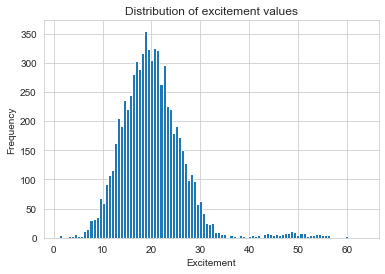

Mean:  20.272176588655892
Standard deviation:  7.032664379984942
Variance:  49.45836828150898


In [168]:
#print fighter names and exictement values for 5 random fights

import random

for i in range(5):
    fight = random.choice(database)
    print(fight.R_fighter, "vs", fight.B_fighter, " excitement is: ", fight.excitement)


print("\n----------------\n")
#print error messages if excitement value is greater than 1 or less than 0
for fight in database:
    if fight.excitement > 100:
        print("ERROR: excitement value is greater than 100")
    elif fight.excitement < 0:
        print("ERROR: excitement value is less than 0")


#print top 10 most exciting fights
print("Top 20 most exciting fights: ")
sorted_database = sorted(database, key=lambda x: x.excitement, reverse=True)
for i in range(20):
    print(sorted_database[i].R_fighter, "vs", sorted_database[i].B_fighter, " excitement is: ", round(sorted_database[i].excitement, 2))
    #print the date of the fight
    print("Date: ", sorted_database[i].date, "\n")


#plot the distribution of excitement values
data = []
for fight in database:
    data.append(fight.excitement)

#plot the distribution using matplotlib
plt.hist(data, bins=100)
plt.xlabel("Excitement")
plt.ylabel("Frequency")
plt.title("Distribution of excitement values")
plt.show()


#mean standard deviation and variance of the distribution
print("Mean: ", np.mean(data))
print("Standard deviation: ", np.std(data))
print("Variance: ", np.var(data))


In [169]:
#this is was added later, to get the optimized database

f = open("Processed_database.csv", "w")

#headers:
f.write("R_fighter,B_fighter,R_record,B_record,Rematch,R_SIG_STR.,B_SIG_STR.,R_CTRL,B_CTRL,win_by,last_round,last_round_time,date,Fight_type,Winner,Excitement")
f.write("\n")

#writing the data:
for fight in database:
    #fix the formatting to save effort later
    f.write(fight.R_fighter)
    f.write(",")
    f.write(fight.B_fighter)
    f.write(",")
    f.write(str(fight.R_record[0]) + "_" + str(fight.R_record[1]) + "_" + str(fight.R_record[2]))
    f.write(",")
    f.write(str(fight.B_record[0]) + "_" + str(fight.B_record[1]) + "_" + str(fight.B_record[2]))
    f.write(",")
    f.write(str(fight.Rematch))
    f.write(",")
    f.write(str(fight.R_SIG_STR[0]) + "_" + str(fight.R_SIG_STR[1]))
    f.write(",")
    f.write(str(fight.B_SIG_STR[0]) + "_" + str(fight.B_SIG_STR[1]))
    f.write(",")
    f.write(str(fight.R_CTRL))
    f.write(",")
    f.write(str(fight.B_CTRL))
    f.write(",")
    f.write(fight.win_by)
    f.write(",")
    f.write(str(fight.last_round))
    f.write(",")
    f.write(str(fight.last_round_time))
    f.write(",")
    f.write(fight.date)
    f.write(",")
    f.write(fight.Fight_type)
    f.write(",")
    f.write(fight.Winner)
    f.write(",")
    f.write(str(round(fight.excitement, 3)))
    f.write("\n")

f.close()
#there was a problem with rematch values, it disappeared when I changed the input file.
print("Complete.")

Complete.


In [170]:
f = open("tiny_database.csv", "w")

#headers:
f.write("R_fighter,B_fighter,Winner,Excitement")
f.write("\n")

#writing the data:
for fight in database:
    #fix the formatting to save effort later
    f.write(fight.R_fighter)
    f.write(",")
    f.write(fight.B_fighter)
    f.write(",")
    f.write(fight.Winner)
    f.write(",")
    f.write(str(round(fight.excitement, 3)))
    f.write("\n")

f.close()
#there was a problem with rematch values, it disappeared when I changed the input file.
print("Complete.")

Complete.
